In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("uber.csv")
df

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [3]:
df.drop(['Unnamed: 0', 'key'],axis=1,inplace=True)
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...
199995,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [4]:
df.isna().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [5]:
df.shape

(200000, 7)

In [6]:
df.dropna(axis=0,inplace=True)
df.shape

(199999, 7)

In [7]:
df.isna().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [8]:
def haversine(lon1,lon2,lat1,lat2):
    lon1,lon2,lat1,lat2 = map(np.radians,[lon1,lon2,lat1,lat2])
    
    diff_lat = lat2-lat1
    diff_lon = lon2-lon1
    
    km = 2*6371*np.arcsin(np.sqrt( np.sin(diff_lat/2.0)**2 + np.cos(lat1)*np.cos(lat2)*np.sin(diff_lon/2.0)**2 ))
    return km

In [9]:
df['Distance'] = haversine(df['pickup_longitude'], df['dropoff_longitude'], df['pickup_latitude'], df['dropoff_latitude'])
df['Distance'] = df['Distance'].astype(float).round(2)

In [10]:
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1,1.68
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1,2.46
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1,5.04
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3,1.66
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5,4.48
...,...,...,...,...,...,...,...,...
199995,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1,0.11
199996,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1,1.88
199997,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2,12.85
199998,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1,3.54


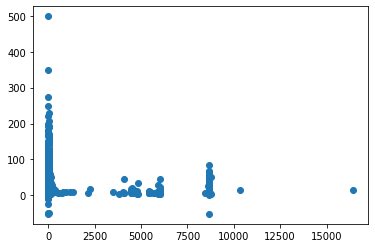

In [11]:
plt.scatter(df['Distance'],df['fare_amount'])

In [13]:
df.drop(df[ df['Distance']<=0 ].index,inplace=True)
df.drop(df[ df['Distance']>60 ].index,inplace=True)
df.drop(df[ df['fare_amount']<=0 ].index,inplace=True)
df.drop(df[ (df['Distance']>0) & (df['fare_amount']<0) ].index,inplace=True)
df.drop(df[ (df['Distance']<=0) & (df['fare_amount']>0) ].index,inplace=True)

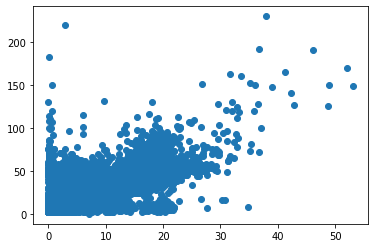

In [14]:
plt.scatter(df['Distance'],df['fare_amount'])

<AxesSubplot:>

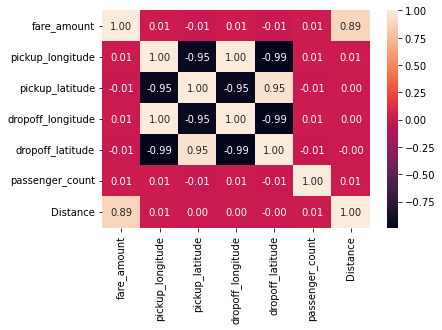

In [15]:
sns.heatmap(df.corr().round(2),annot=True,fmt="0.2f")

In [16]:
X = df['Distance'].values.reshape(-1,1)
X

array([[ 1.68],
       [ 2.46],
       [ 5.04],
       ...,
       [12.85],
       [ 3.54],
       [ 5.42]])

In [17]:
Y = df['fare_amount'].values.reshape(-1,1)
Y

array([[ 7.5],
       [ 7.7],
       [12.9],
       ...,
       [30.9],
       [14.5],
       [14.1]])

In [19]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X = std.fit_transform(X)
X

array([[-0.46595961],
       [-0.24926103],
       [ 0.46751116],
       ...,
       [ 2.63727506],
       [ 0.05078314],
       [ 0.57308226]])

In [20]:
Y = std.fit_transform(Y)
Y

array([[-0.40029375],
       [-0.37931624],
       [ 0.16609899],
       ...,
       [ 2.05407478],
       [ 0.33391906],
       [ 0.29196404]])

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.25,random_state=50)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((145117, 1), (48373, 1), (145117, 1), (48373, 1))

In [22]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [24]:
y_pred = reg.predict(x_test)
y_pred

array([[-0.14113234],
       [-0.49864004],
       [-0.22989288],
       ...,
       [-0.20523717],
       [ 0.02652644],
       [-0.29153214]])

In [28]:
reg.intercept_, reg.coef_

(array([-0.00128332]), array([[0.88747464]]))

In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

0.24299751835742384
0.22560623568342647


In [36]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=100,max_depth=5,max_features='sqrt',random_state=50)

In [38]:
rfr.fit(x_train,y_train.ravel())

RandomForestRegressor(max_depth=5, max_features='sqrt', random_state=50)

In [39]:
rfr_pred = rfr.predict(x_test)

In [40]:
print(mean_absolute_error(y_test,rfr_pred))
print(mean_squared_error(y_test,rfr_pred))

0.24294719888481747
0.22060454450819925
